# Fault Diagnosis of Gear

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

![](https://therustyfox.com/wp-content/uploads/2019/02/IMG_0301-1024x771.jpg)

![Drag Racing](https://www.mikipulley.co.jp/en/services/tech_data/img/tech_img41.png)

## Dataset (https://www.kaggle.com/brjapon/gearbox-fault-diagnosis)

In [23]:
Directory='H:\Gear Fault\Gear Data\BrokenTooth'

In [25]:
for root, dirs, files in os.walk(Directory):
        for i in range (len(files)):
            print(files[i])
            

b30hz00.csv
b30hz10.csv
b30hz20.csv
b30hz30.csv
b30hz40.csv
b30hz50.csv
b30hz60.csv
b30hz70.csv
b30hz80.csv
b30hz90.csv


In [26]:
root

'H:\\Gear Fault\\Gear Data\\BrokenTooth'

In [27]:
path = os.path.join(root,files[0])
path

'H:\\Gear Fault\\Gear Data\\BrokenTooth\\b30hz00.csv'

In [28]:
df_temp = pd.read_csv(path)
df_temp

,a1,a2,a3,a4
0,2.350390,1.454870,-1.667080,-2.055610
1,2.452970,1.400100,-2.825100,0.984487
2,-0.241284,-0.267390,0.793540,0.605862
3,1.130270,-0.890918,0.696969,0.613068
4,-1.296140,0.980479,-1.130560,-0.346971
...,...,...,...,...
88315,1.658100,-6.309490,0.821900,-3.357700
88316,2.253370,-3.105760,2.791110,-3.016840
88317,2.625840,3.814600,1.330690,-0.759645
88318,5.358220,6.105210,-1.367490,0.891057


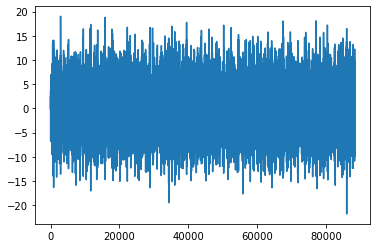

In [29]:
plt.plot(df_temp.iloc[:,0])

In [34]:
int(files[0][5:-4])/100

0.0

In [35]:
int(files[0][5:-4])/100

0.0

In [36]:
load_col = [int(files[0][5:-4])/100 for j in range(len(df_temp))]
           

In [37]:
lab='F'

label_col = [lab for j in range(len(df_temp))]

In [38]:
label_col

['F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F'

In [39]:
df_temp['load']=load_col
df_temp['fault']=label_col

In [40]:
df_temp

,a1,a2,a3,a4,load,fault
0,2.350390,1.454870,-1.667080,-2.055610,0.0,F
1,2.452970,1.400100,-2.825100,0.984487,0.0,F
2,-0.241284,-0.267390,0.793540,0.605862,0.0,F
3,1.130270,-0.890918,0.696969,0.613068,0.0,F
4,-1.296140,0.980479,-1.130560,-0.346971,0.0,F
...,...,...,...,...,...,...
88315,1.658100,-6.309490,0.821900,-3.357700,0.0,F
88316,2.253370,-3.105760,2.791110,-3.016840,0.0,F
88317,2.625840,3.814600,1.330690,-0.759645,0.0,F
88318,5.358220,6.105210,-1.367490,0.891057,0.0,F


# Preprocess The Dataset

In [42]:


def MakeDataset(Directory,lab):
    df=pd.DataFrame(columns=['a1','a2','a3','a4'])

    for root, dirs, files in os.walk(Directory):
        for i in range (len(files)):

            path = os.path.join(root,files[i])

            df_temp = pd.read_csv(path)
            load_col = [int(files[i][5:-4])/100 for j in range(len(df_temp))]
            label_col = [lab for j in range(len(df_temp))]
            df_temp['load']=load_col
            df_temp['fault']=label_col


            df = pd.concat([df,df_temp],axis=0)

            print(path)
            
    return df       

In [43]:
Directory='H:\Gear Fault\Gear Data\BrokenTooth'
df_F = MakeDataset(Directory,lab='F')

H:\Gear Fault\Gear Data\BrokenTooth\b30hz00.csv
H:\Gear Fault\Gear Data\BrokenTooth\b30hz10.csv
H:\Gear Fault\Gear Data\BrokenTooth\b30hz20.csv
H:\Gear Fault\Gear Data\BrokenTooth\b30hz30.csv
H:\Gear Fault\Gear Data\BrokenTooth\b30hz40.csv
H:\Gear Fault\Gear Data\BrokenTooth\b30hz50.csv
H:\Gear Fault\Gear Data\BrokenTooth\b30hz60.csv
H:\Gear Fault\Gear Data\BrokenTooth\b30hz70.csv
H:\Gear Fault\Gear Data\BrokenTooth\b30hz80.csv
H:\Gear Fault\Gear Data\BrokenTooth\b30hz90.csv


In [44]:
df_F

,a1,a2,a3,a4,load,fault
0,2.350390,1.454870,-1.667080,-2.055610,0.0,F
1,2.452970,1.400100,-2.825100,0.984487,0.0,F
2,-0.241284,-0.267390,0.793540,0.605862,0.0,F
3,1.130270,-0.890918,0.696969,0.613068,0.0,F
4,-1.296140,0.980479,-1.130560,-0.346971,0.0,F
...,...,...,...,...,...,...
105723,4.434170,-2.037930,-0.546417,1.181320,0.9,F
105724,2.903320,-2.820350,-2.486930,0.115640,0.9,F
105725,-1.617990,1.278610,-6.159510,-1.376230,0.9,F
105726,-2.011220,-4.029450,-0.082050,0.932847,0.9,F


In [45]:
Directory='H:\Gear Fault\Gear Data\Healthy'
df_H = MakeDataset(Directory,lab='H')

H:\Gear Fault\Gear Data\Healthy\h30hz00.csv
H:\Gear Fault\Gear Data\Healthy\h30hz10.csv
H:\Gear Fault\Gear Data\Healthy\h30hz20.csv
H:\Gear Fault\Gear Data\Healthy\h30hz30.csv
H:\Gear Fault\Gear Data\Healthy\h30hz40.csv
H:\Gear Fault\Gear Data\Healthy\h30hz50.csv
H:\Gear Fault\Gear Data\Healthy\h30hz60.csv
H:\Gear Fault\Gear Data\Healthy\h30hz70.csv
H:\Gear Fault\Gear Data\Healthy\h30hz80.csv
H:\Gear Fault\Gear Data\Healthy\h30hz90.csv


In [46]:
df_H

,a1,a2,a3,a4,load,fault
0,4.636710,0.516978,-3.205940,1.82241,0.0,H
1,1.992800,4.184660,-2.740610,2.80436,0.0,H
2,-3.764110,0.997335,-1.303090,1.83668,0.0,H
3,-4.558710,6.104330,-1.720690,1.72311,0.0,H
4,0.575382,0.170980,-0.497967,-1.32895,0.0,H
...,...,...,...,...,...,...
106747,0.677448,-3.234410,-1.725990,-3.14302,0.9,H
106748,-10.575400,7.725400,-2.184010,2.56965,0.9,H
106749,-4.033290,2.576920,1.468430,2.72891,0.9,H
106750,1.868670,-5.089400,5.342290,-1.36563,0.9,H


In [47]:
df = pd.concat([df_F,df_H],axis=0)

df.to_csv(r'H:\Gear Fault\Gear_Fault_data.csv',index=False)

# Import and scale the data

In [9]:
df  = pd.read_csv('Gear_Fault_data.csv')

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df.iloc[:,:-2]=scaler.fit_transform(df.iloc[:,:-2])

df